# Introduction
**The café culture has had long history in Melbourne since 1890s. It has created a significant impact on the food scene. It started with traditional style café and street coffee stalls between 1900s and 1950s. The café culture started gaining attention in 1970s and gradually evolved into a relaxing and less formal dining venue over the last two decades. Up to date, there are hundreds of café operating in Melbourne, Australia.**

**As a customer, a coffee lover, a foodie or a tourist, how would you make the decision and choose the right cafe?**

**Aim**
•	Explore a great variety of cafés in Melbourne
•	Investigate the general affordability of dining in cafés
•	Understand the rating and reviews of cafés
•	Provide an easier way to choose by categorizing the cafés



# Methodology 
**In this project, several exploratory data analysis techniques were performed with main focuses on the impact of price range, ratings, magnitude of reviews. In the last part, KMeans clustering was executed for the categorization of cafés.**  


# Import necessary libraries

In [1]:
from geopy.geocoders import Nominatim
import requests
import json
import pandas as pd
import numpy as np

from pandas.io.json import json_normalize

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

!python -m pip install folium
import folium 

     |████████████████████████████████| 102kB 12.2MB/s ta 0:00:01


# Data loading and pre-processing

**Retrieve the geographical coordinates of Melbourne, Australia**

In [2]:
address = "Melbourne CBD"

geolocator = Nominatim(user_agent= "au_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The geograpical coordinate of Melbourne CBD are {}, {}.".format(latitude,longitude) )

The geograpical coordinate of Melbourne CBD are -37.8152834, 144.9618789.


**Using Zamato API to retrieve information of 100 cafes in Melbourne CBD within 10km radius.** 


**As Zamato API limits to 20 results per call, use a for loop to execute 5 iterations and receive details of 100 cafes. (Category ID =6 for Cafe)** 

In [9]:
cafe_df = pd.DataFrame()

radius = 10000
category = 6
iterround = 5
start = 0

filtered_columns = ['restaurant.name', 'restaurant.cuisines', 'restaurant.location.address', 'restaurant.location.latitude', 'restaurant.location.longitude','restaurant.user_rating.aggregate_rating','restaurant.user_rating.votes','restaurant.price_range','restaurant.average_cost_for_two']

for i in range(iterround):
    
    zomato_url = 'https://developers.zomato.com/api/v2.1/search?lat={}&lon={}&radius={}&category={}&start={}&count=20'.format(latitude,longitude,radius,category,start)
    
    print(zomato_url)
    zomato_result = requests.get(zomato_url, headers = {'user-key':'*****'}).json()
    cafe = zomato_result['restaurants']
    

    cafe_venue = json_normalize(cafe)
    cafe_venue_filtered = cafe_venue.loc[:, filtered_columns]
    
    cafe_df = pd.concat([cafe_df,cafe_venue_filtered],axis=0, sort =False)
    
    start = start + 20
    print('no of cafes addes', start)    

https://developers.zomato.com/api/v2.1/search?lat=-37.8152834&lon=144.9618789&radius=10000&category=6&start=0&count=20
no of cafes addes 20
https://developers.zomato.com/api/v2.1/search?lat=-37.8152834&lon=144.9618789&radius=10000&category=6&start=20&count=20
no of cafes addes 40
https://developers.zomato.com/api/v2.1/search?lat=-37.8152834&lon=144.9618789&radius=10000&category=6&start=40&count=20
no of cafes addes 60
https://developers.zomato.com/api/v2.1/search?lat=-37.8152834&lon=144.9618789&radius=10000&category=6&start=60&count=20
no of cafes addes 80
https://developers.zomato.com/api/v2.1/search?lat=-37.8152834&lon=144.9618789&radius=10000&category=6&start=80&count=20
no of cafes addes 100


**Clean up data, including dropping outlier, reset index, rename columns**

In [10]:
cafe_df.shape

(100, 9)

In [13]:
cafe_df.drop(cafe_df[cafe_df['restaurant.name']=='Liar Liar'].index , inplace=True)



In [14]:
cafe_df.reset_index(drop=True, inplace=True)

In [15]:
cafe_df

,restaurant.name,restaurant.cuisines,restaurant.location.address,restaurant.location.latitude,restaurant.location.longitude,restaurant.user_rating.aggregate_rating,restaurant.user_rating.votes,restaurant.price_range,restaurant.average_cost_for_two
0,The Hardware Societe,"French, Cafe Food, Coffee and Tea","123 Hardware Street, CBD, Melbourne",-37.8120317331,144.9604676664,4.6,8633,3,60
1,Humble Rays,"Coffee and Tea, Cafe Food, Asian Fusion","71 Bouverie Street, Carlton, Melbourne",-37.8048177217,144.9615536258,4.8,2302,3,50
2,Higher Ground,"Cafe Food, Coffee and Tea","650 Little Bourke Street, CBD, Melbourne",-37.8159708780,144.9530480057,4.2,1846,3,60
3,Top Paddock,"Coffee and Tea, Cafe Food","658 Church Street, Richmond, Melbourne",-37.8328107891,144.9964692816,4.5,4973,3,60
4,Manchester Press,"Coffee and Tea, Cafe Food","8 Rankins Lane, CBD, Melbourne",-37.8139099517,144.9621769041,4.4,5231,2,40
5,Shanklin Cafe,"Modern Australian, Coffee and Tea, Cafe Food","500 Tooronga Road, Hawthorn, Melbourne",-37.8331123984,145.0473296642,4.8,1060,3,50
6,Serotonin Eatery,"Cafe Food, Healthy Food, Vegan","52 Madden Grove, Burnley, Richmond, Melbourne",-37.8281773961,145.0091433898,4.6,1624,3,65
7,Operator25,"Coffee and Tea, Cafe Food","25 Wills Street, CBD",-37.8106103896,144.9571014941,4.3,2688,3,55
8,Le Petit Gateau,"French, Desserts, Coffee and Tea","458 Little Collins Street, CBD, Melbourne",-37.8163464526,144.9596324936,4.9,1656,2,30
9,Journeyman,"Coffee and Tea, Cafe Food","169 Chapel Street, Windsor, Melbourne, VIC",-37.8522378412,144.9932469428,4.7,2773,3,55


In [16]:
cafe_df.rename(columns={'restaurant.name' :'name',
                        'restaurant.cuisines' :'cuisine',
                       'restaurant.location.address' :'address',
                       'restaurant.location.latitude' :'latitude',
                       'restaurant.location.longitude' :'longitude',
                       'restaurant.user_rating.aggregate_rating' :'rating',
                       'restaurant.user_rating.votes' :'votes',
                       'restaurant.price_range' :'price_range',
                       'restaurant.average_cost_for_two' :'average_cost_for_two'},inplace=True )

cafe_df.head()

,name,cuisine,address,latitude,longitude,rating,votes,price_range,average_cost_for_two
0,The Hardware Societe,"French, Cafe Food, Coffee and Tea","123 Hardware Street, CBD, Melbourne",-37.8120317331,144.9604676664,4.6,8633,3,60
1,Humble Rays,"Coffee and Tea, Cafe Food, Asian Fusion","71 Bouverie Street, Carlton, Melbourne",-37.8048177217,144.9615536258,4.8,2302,3,50
2,Higher Ground,"Cafe Food, Coffee and Tea","650 Little Bourke Street, CBD, Melbourne",-37.8159708780,144.9530480057,4.2,1846,3,60
3,Top Paddock,"Coffee and Tea, Cafe Food","658 Church Street, Richmond, Melbourne",-37.8328107891,144.9964692816,4.5,4973,3,60
4,Manchester Press,"Coffee and Tea, Cafe Food","8 Rankins Lane, CBD, Melbourne",-37.8139099517,144.9621769041,4.4,5231,2,40


**Using the details achieved from ZAMATO API to retrieve accurate latitude and longitude from Foursquare**

**This lat and lng will be used as location parameters in plot later**

In [17]:
CLIENT_ID = '*****' # your Foursquare ID
CLIENT_SECRET = '*****' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
latitude=-37.8029400666
longitude =144.9590373784
radius = 5000
LIMIT = 1
 
foursquare_cafe_df = pd.DataFrame()

filtered_columns1 = ['location.lat','location.lng','location.address' ]

for i, row in cafe_df.iterrows():  
    foursquare_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, row['latitude'], row['longitude'], VERSION,  LIMIT)
    
    foursquare_results = requests.get(foursquare_url).json()
    
    foursquare_venues = foursquare_results['response']['venues']
    foursquare_venues = json_normalize(foursquare_venues)
    
    foursquare_venues = foursquare_venues.loc[:, filtered_columns1]
    
    foursquare_cafe_df = pd.concat([foursquare_cafe_df,foursquare_venues],axis=0, sort =False)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [18]:
 foursquare_cafe_df.reset_index(drop=True, inplace=True)

In [19]:
 foursquare_cafe_df.shape

(99, 3)

In [20]:
foursquare_cafe_df.head()

,location.lat,location.lng,location.address
0,-37.812016,144.960540,120 Hardware St
1,-37.804729,144.961927,71 Bouverie Street
2,-37.815995,144.953029,650 Little Bourke St
3,-37.832724,144.996456,658 Church St
4,-37.813740,144.962132,8 Rankins Ln


**At this stage, the required data were successfully achieved!**

#  Analysis

**In this section, we looked into the effects of rating and price range and visualised through plots.**

**The Average Cost of Dining in Cafes**

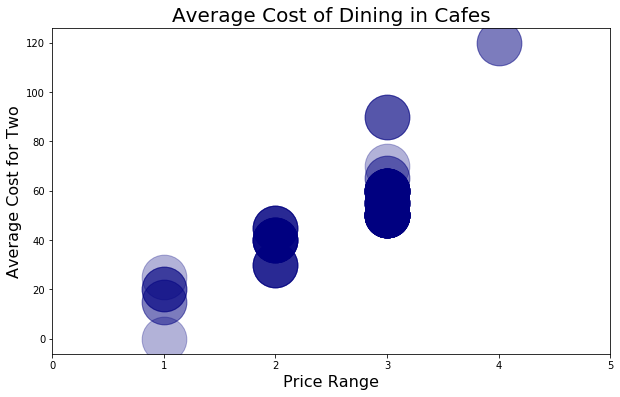

In [68]:
cafe_df.plot(kind='scatter',
             x='price_range',
             y='average_cost_for_two',
             figsize=(10,6),
             alpha=0.3,
             color ='navy',
             s = 2000 ,
             xlim=(0,5)
            )

plt.xlabel('Price Range',fontsize=16) 
plt.ylabel('Average Cost for Two',fontsize=16)
plt.title('Average Cost of Dining in Cafes', fontsize=20) 

plt.show()

**The Price Range of Cafes in Melbourne, Australia**

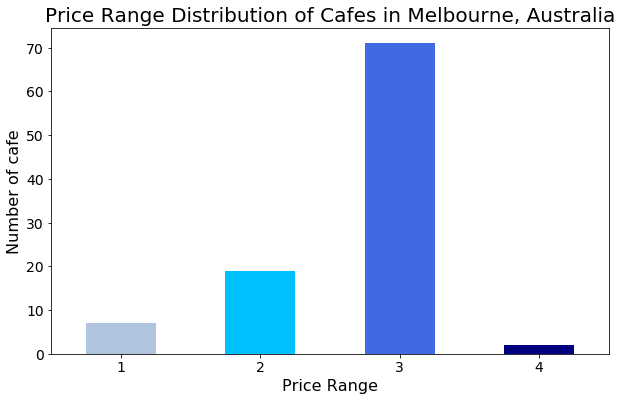

In [69]:
price_range = cafe_df['price_range']

price_range_group = price_range.value_counts()

price_range_group.sort_index(ascending=True).plot(kind='bar', figsize=(10, 6), xlim=(0,5), color=['lightsteelblue','deepskyblue','royalblue','navy'])

plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Price Range',fontsize=16) 
plt.ylabel('Number of cafe',fontsize=16)
plt.title('Price Range Distribution of Cafes in Melbourne, Australia', fontsize=20) 

plt.show()

**Rating of Cafes in Melbourne, Australia**

In [70]:
cafe_df['rating'].astype(float).describe()

count    99.000000
mean      4.379798
std       0.509898
min       0.000000
25%       4.300000
50%       4.400000
75%       4.600000
max       4.900000
Name: rating, dtype: float64

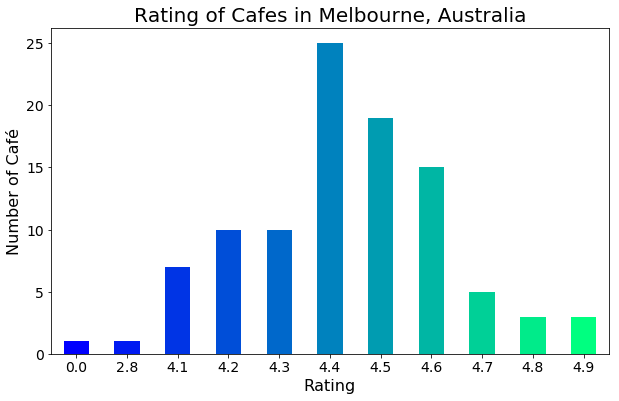

In [71]:
rating = cafe_df['rating'].astype(float)

rating_group = rating.value_counts()

colors = cm.winter(np.linspace(0,5))

rating_group.sort_index(ascending=True).plot(kind='bar', figsize=(10, 6), color=colors)

plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Rating',fontsize=16) 
plt.ylabel('Number of Café',fontsize=16)
plt.title('Rating of Cafes in Melbourne, Australia', fontsize=20) 

plt.show()

**General Number of Reviews of Cafes in Melbourne, Australia**

Text(0.5, 1.0, 'Magnitude of Votes on Rating')

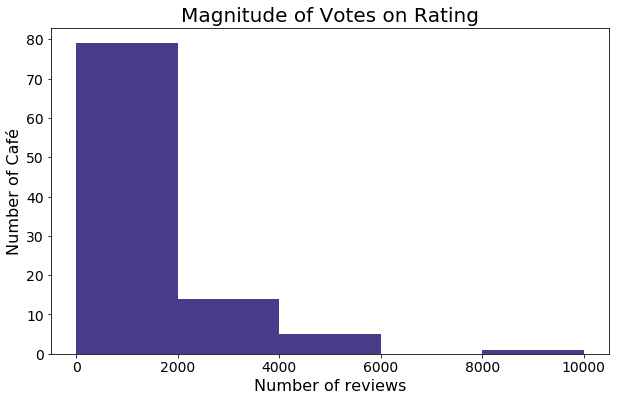

In [72]:
popularity = cafe_df['votes'].astype(float).transpose()

bins = [0,2000,4000,6000,8000,10000]

popularity.plot(kind='hist', figsize=(10, 6), bins=bins,color=['darkslateblue'])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of reviews',fontsize=16) 
plt.ylabel('Number of Café',fontsize=16)
plt.title('Magnitude of Votes on Rating', fontsize=20) 


**Further breakdown of reviews less than 2000**

Text(0.5, 1.0, 'Magnitude of Votes on Rating (Magnified)')

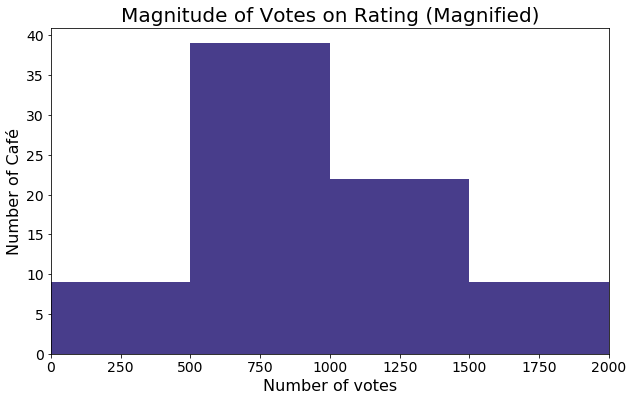

In [73]:
popularity = cafe_df['votes'].astype(float).transpose()

bins = [0,500,1000,1500,2000]

popularity.plot(kind='hist', figsize=(10, 6), xlim=(0,2000), bins=bins,color=['darkslateblue'])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of votes',fontsize=16) 
plt.ylabel('Number of Café',fontsize=16)
plt.title('Magnitude of Votes on Rating (Magnified)', fontsize=20) 


# Clustering

**Combine both dataframes from Zamato and Foursquare**

In [74]:
combine_df = pd.concat([cafe_df,foursquare_cafe_df],axis=1)

filtered_columns2 = ['name','location.lat','location.lng','location.address','rating','average_cost_for_two']
combine_df = combine_df.loc[:, filtered_columns2]

combine_df 


,name,location.lat,location.lng,location.address,rating,average_cost_for_two
0,The Hardware Societe,-37.812016,144.960540,120 Hardware St,4.6,60
1,Humble Rays,-37.804729,144.961927,71 Bouverie Street,4.8,50
2,Higher Ground,-37.815995,144.953029,650 Little Bourke St,4.2,60
3,Top Paddock,-37.832724,144.996456,658 Church St,4.5,60
4,Manchester Press,-37.813740,144.962132,8 Rankins Ln,4.4,40
5,Shanklin Cafe,-37.833094,145.047340,500 Tooronga Road,4.8,50
6,Serotonin Eatery,-37.828182,145.009189,52 Madden Grove,4.6,65
7,Operator25,-37.810705,144.957075,25 Wills St,4.3,55
8,Le Petit Gateau,-37.816254,144.959585,458 Little Collins St.,4.9,30
9,Journeyman,-37.852185,144.993306,169 Chapel St.,4.7,55


**Plot all cafe locations on map**

In [75]:
cafe_map_melbourne = folium.Map(location=[latitude, longitude], zoom_start=12)

neighborhood= 'Melbourne'
state= 'VIC'

# add markers to map
for lat, lng in zip(combine_df['location.lat'], combine_df['location.lng']):
    label = '{}, {}'.format(neighborhood, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(cafe_map_melbourne)  
    
cafe_map_melbourne

**Generate 3 clusters and execute KMeans Clustering**

In [76]:
kclusters = 3

combine_df_cluster = combine_df.drop(['name','location.address'],axis=1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(combine_df_cluster)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [78]:
combine_df.insert(0, 'Cluster Labels', kmeans.labels_)


**Plot result on map with different colors**

In [79]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

color_map = { 0: 'red', 1: 'yellow', 2:'navy'}


markers_colors = []
for lat, lon, cluster in zip(combine_df['location.lat'], combine_df['location.lng'], combine_df['Cluster Labels']):
    label = folium.Popup( ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color_map[cluster],
        fill=True,
        fill_color=color_map[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine Clusters

**Cluster 1**

In [80]:
cluster_1 = combine_df.loc[combine_df['Cluster Labels'] == 0, combine_df.columns[[1] + list(range(5, combine_df.shape[1]))]]

cluster_1



,name,rating,average_cost_for_two
0,The Hardware Societe,4.6,60
1,Humble Rays,4.8,50
2,Higher Ground,4.2,60
3,Top Paddock,4.5,60
4,Manchester Press,4.4,40
5,Shanklin Cafe,4.8,50
6,Serotonin Eatery,4.6,65
7,Operator25,4.3,55
9,Journeyman,4.7,55
10,Seven Seeds,4.4,50


In [81]:
print("These cafes have average cost of ${:.02f} for two persons and rating around {:.02f}".format(cluster_1['average_cost_for_two'].mean(), cluster_1['rating'].astype(float).mean()))

These cafes have average cost of $52.68 for two persons and rating around 4.39


**Cluster 2**

In [82]:
cluster_2 = combine_df.loc[combine_df['Cluster Labels'] == 1, combine_df.columns[[1] + list(range(5, combine_df.shape[1]))]]

cluster_2

,name,rating,average_cost_for_two
46,Third Wave Cafe,4.4,120
60,Tiamo,4.4,90
81,Brunetti,4.4,90
85,"Borsch, Vodka & Tears",4.5,90
96,Entrecôte,4.2,120


In [83]:
print("These cafes have average cost of ${:.02f} for two persons and rating around {:.02f}".format(cluster_2['average_cost_for_two'].mean(), cluster_2['rating'].astype(float).mean()))

These cafes have average cost of $102.00 for two persons and rating around 4.38


**Cluster 3**

In [84]:
cluster_3 = combine_df.loc[combine_df['Cluster Labels'] == 2, combine_df.columns[[1] + list(range(5, combine_df.shape[1]))]]
cluster_3


,name,rating,average_cost_for_two
8,Le Petit Gateau,4.9,30
11,Beatrix,4.9,30
16,Brother Baba Budan,4.6,15
23,Patricia Coffee Brewers,4.9,15
27,Little Rogue,4.7,20
29,Shortstop Coffee & Donuts,4.6,20
34,Bibelot,4.8,30
37,Mörk Chocolate Brew House,4.6,30
51,The League of Honest Coffee,4.5,30
58,Matcha by Chokolait,4.5,25


In [85]:
print("These cafes have average cost of ${:.02f} for two persons and rating around {:.02f}".format(cluster_3['average_cost_for_two'].mean(), cluster_3['rating'].astype(float).mean()))

These cafes have average cost of $22.08 for two persons and rating around 4.30


# Conclusion

    In conclusion, this project explored the cafés in Melbourne, Australia in terms of dining cost and rating. Firstly, the average dining cost spread in the range and $20 and $120. 70% of the selected cafés had a price range of 3 which indicated the average cost for two persons to be $50. On the other hand, the selected cafés received an average rating of 4.38/5.0 which indicated the good quality of food and coffee as well as the service. According to data, 70% of cafés received more than 500 votes in generating the average rating which simply reflected that the reliability of rating is high enough to be used as a selecting criterion. Lastly, the cafés were clustered into three categories for the stakeholders which provided them a guideline to select the right café based on their preferences. To briefly summarize, Cluster 1 included cafés with average dining cost and good rating, Cluster 2 showed high dining cost and average rating and Cluster 3 presented low dining cost and low rating.